# Import các thư viện

Thư viện cần thiết:

- ImageDataGenerator: để tăng cường dữ liệu hình ảnh.
- SGD (Stochastic Gradient Descent): là bộ tối ưu hóa.
- load_img, img_to_arra: để tải và chuyển đổi hình ảnh.
- plt: từ matplotlib để vẽ đồ thị.
- load_model: để tải mô hình đã lưu.
- np (NumPy): để xử lý dữ liệu số.
- Sequential, Dense, Flatten, Conv2D, MaxPooling2D: để xây dựng mô hình CNN.

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Tăng cường và chuẩn bị dữ liệu

- ImageDataGenerator tạo các biến thể của hình ảnh gốc để tăng cường dữ liệu huấn luyện.
- rescale=1./255 chuẩn hóa dữ liệu hình ảnh từ giá trị 0-255 thành 0-1.
- shear_range, zoom_range, horizontal_flip tạo biến đổi cắt xén, phóng to, lật ngang ảnh.

In [2]:
# Chuẩn bị dữ liệu huấn luyện và kiểm tra
train = ImageDataGenerator(rescale=1./255,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True)

train_url = 'Face_data/train'

validation = ImageDataGenerator(rescale=1./255)
validation_url = 'Face_data/test'

# Tải dữ liệu từ thư mục

- flow_from_directory: tải hình ảnh từ thư mục và gán nhãn theo cấu trúc thư mục.
- target_size=(150,150): thay đổi kích thước ảnh về 150x150.
- batch_size=128: số lượng mẫu trong mỗi đợt.
- class_mode='categorical': nhãn dữ liệu được mã hóa một cách phân loại.

In [3]:
train_dataset = train.flow_from_directory(train_url,
                                          target_size=(150,150),
                                          batch_size=128,
                                          class_mode='categorical')

validation_dataset = validation.flow_from_directory(validation_url,
                                                    target_size=(150,150),
                                                    batch_size=128,
                                                    class_mode='categorical')

Found 262 images belonging to 4 classes.


Found 68 images belonging to 4 classes.


# Xác định số lớp

- class_indices: trả về từ điển với các lớp và chỉ số tương ứng.
- num_classes: đếm số lớp từ dữ liệu huấn luyện.

In [4]:
# Kiểm tra số lượng lớp trong dữ liệu
num_classes = len(train_dataset.class_indices)
print("Số classes trong train data:", num_classes)
print("Số classes trong test data:", len(validation_dataset.class_indices))

Số classes trong train data: 4
Số classes trong test data: 4


# Xây dựng mô hình CNN

- Sequential(): khởi tạo mô hình tuần tự.
- Conv2D: thêm các lớp tích chập (convolutional layers) với 32, 64, 128, 256 filters, kích thước kernel 3x3.
- activation='relu': sử dụng hàm kích hoạt ReLU.
- kernel_initializer='he_uniform': khởi tạo trọng số.
- padding='same': giữ kích thước đầu ra giống đầu vào.
- input_shape=(150, 150, 3): định dạng đầu vào.
- MaxPooling2D((2, 2)): giảm kích thước không gian đầu ra bằng pooling 2x2.
- Flatten(): chuyển đổi ma trận thành vector.
- Dense: thêm lớp fully-connected.
- num_classes: điều chỉnh số lớp đầu ra tương ứng với số lớp của dữ liệu.

In [5]:
# Xây dựng mô hình CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))  # Cập nhật số lượng lớp đầu ra

# In mô hình tóm tắt

- summary(): in cấu trúc mô hình, các lớp, và số lượng tham số.

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                   

# Biên dịch mô hình

- SGD(lr=0.001, momentum=0.9): khởi tạo bộ tối ưu hóa với học suất 0.001 và động lượng 0.9.
- compile: thiết lập bộ tối ưu hóa, hàm mất mát và chỉ số đánh giá.

In [7]:
# Biên dịch mô hình
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình

- fit: bắt đầu huấn luyện mô hình với dữ liệu huấn luyện.
- batch_size=128: kích thước batch.
- epochs=50: số lần lặp qua toàn bộ dữ liệu.
- validation_data: dữ liệu kiểm tra để đánh giá mô hình sau mỗi epoch.

In [ ]:
# Huấn luyện mô hình
history = model.fit(train_dataset, batch_size=128, epochs=50, verbose=1, validation_data=validation_dataset)

# Lưu mô hình

- save: lưu mô hình đã huấn luyện vào tệp.

In [ ]:
# Lưu mô hình
model.save('Face_data/predict/Final_test.h5')

# Đánh giá mô hình

- load_model: tải mô hình đã lưu.
- evaluate: đánh giá mô hình với dữ liệu kiểm tra.
- score: chứa giá trị sai số và độ chính xác.

In [11]:
# Đánh giá mô hình
model_Final = load_model('Face_data/predict/Final_test.h5')

In [ ]:
score = model_Final.evaluate(validation_dataset, verbose=1)
print('Sai số:', score[0])
print('Độ chính xác:', score[1])

# Vẽ đồ thị

- plot: vẽ đồ thị độ chính xác huấn luyện và kiểm tra qua các epoch.
- legend, xlabel, ylabel: thêm chú thích và nhãn cho đồ thị.

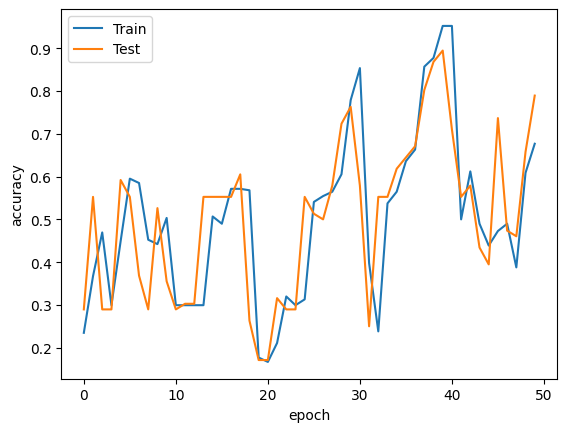

In [20]:
# Vẽ đồ thị độ chính xác
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Dự đoán với hình ảnh mới

- load_img tải hình ảnh và thay đổi kích thước.
- plt.imshow hiển thị hình ảnh.
- img_to_array chuyển đổi hình ảnh thành mảng.
- reshape định hình lại mảng.
- astype('float32') chuyển đổi kiểu dữ liệu.
- img/255 chuẩn hóa hình ảnh.
- predict dự đoán nhãn của hình ảnh.
- Label chứa các nhãn tương ứng với các lớp.
- np.argmax lấy chỉ số của giá trị lớn nhất trong dự đoán.
- print in ra nhãn dự

1/1 [==============================] - 0s 179ms/step
Dự đoán là: Long


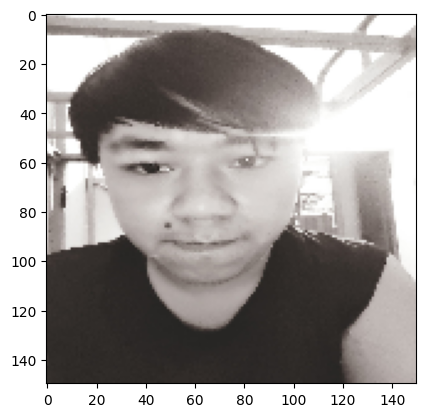

In [21]:
# Dự đoán với một ảnh mới
img = load_img('D:\Chatbot\Face_data\predict\img_10.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Duong', 'Long', 'Phong', 'Vu']
print('Dự đoán là:', Label[int(np.argmax(model_Final.predict(img), axis=-1))])